In [1]:
import qiskit
import pytket
from matplotlib import pyplot as plt

First create the circuit

In [2]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle

oracle = TruthTableOracle('0100')
grover = Grover(oracle)
circuit = grover.construct_circuit(measurement= True)

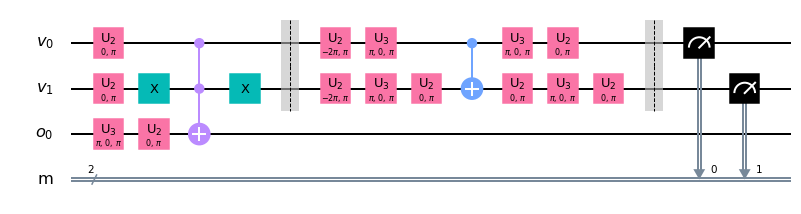

In [3]:
circuit.draw('mpl')

Convert the circuit to tket

In [4]:
from pytket.qiskit import qiskit_to_tk
circuit = qiskit_to_tk(circuit)

In [5]:
circuit

[U3(1*PI, 0*PI, 1*PI) o[0]; U2(0*PI, 1*PI) v[0]; U2(0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) o[0]; X v[1]; CCX v[0], v[1], o[0]; X v[1]; Barrier v[0], v[1]; U2(0*PI, 1*PI) v[0]; U2(0*PI, 1*PI) v[1]; U3(1*PI, 0*PI, 1*PI) v[0]; U3(1*PI, 0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) v[1]; CX v[0], v[1]; U3(1*PI, 0*PI, 1*PI) v[0]; U2(0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) v[0]; U3(1*PI, 0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) v[1]; Barrier v[0], v[1]; Measure v[0] --> m[0]; Measure v[1] --> m[1]; ]

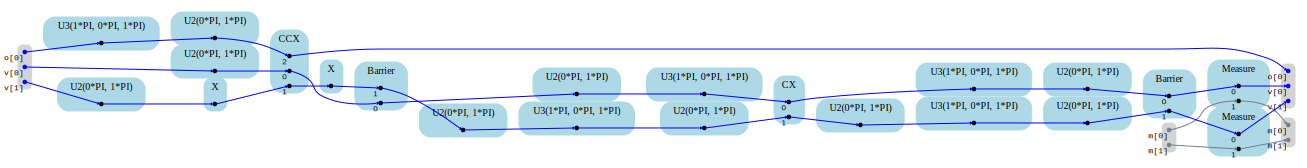

In [6]:
from pytket.utils import Graph
Graph(circuit).get_DAG()

In [7]:
from pytket.backends.ibm import IBMQBackend
backend = IBMQBackend("ibmq_16_melbourne");

/home/tim/anaconda3/envs/planqk/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [8]:
backend.compile_circuit(circuit)

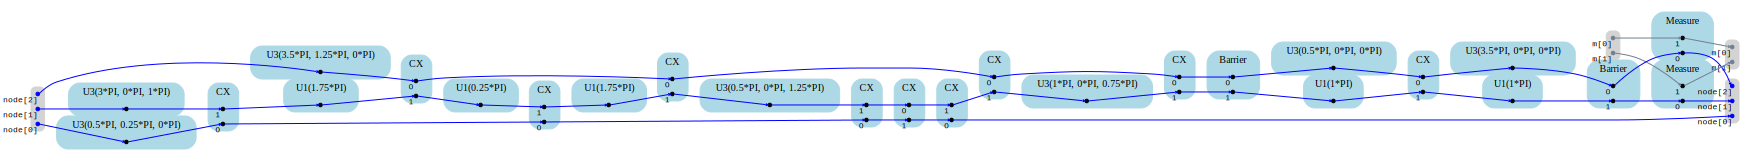

In [9]:
Graph(circuit).get_DAG()

In [10]:
job = backend.process_circuit(circuit, n_shots=1000)

In [11]:
job

ResultHandle('5fb652e257ed400019dc23f3', 0)

In [12]:
status = backend.circuit_status(job)

In [13]:
status

CircuitStatus(status=<StatusEnum.SUBMITTED: 'Circuit has been submitted.'>, message='job is being validated')

In [14]:
result = backend.get_result(job)

Job Status: job has successfully run


In [15]:
result.get_counts()

Counter({(0, 0): 114, (0, 1): 84, (1, 0): 590, (1, 1): 212})